In [31]:
# 선형 회귀

import pandas as pd

df = pd.read_csv('data/Fish.csv')
df.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [32]:
# 길이 기반으로 무게 예측하기

# 도미 필터링 -> 길이/무게만 추출
perch_df = df.loc[df['Species'] == 'Perch']
perch_length = perch_df[['Length2']]
perch_weight = perch_df[['Weight']]

# 학습 데이터 만들기
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(perch_length, perch_weight)
    # 길이 기반으로 무게 찾을 거니까 이렇게 작성

# 선형 회귀 알고리즘 가져오기: linear
from sklearn.linear_model import LinearRegression
lr = LinearRegression() # 인스턴스화
lr.fit(train_input, train_target) # 2차원 아니어서 오류날 시, 처음에 data 만들 때 대괄호 2개로 만들어서 2차원 데이터로 만들기
lr.score(test_input, test_target)

# 예측하기: 50cm 도미 넣으면 무게는?
lr.predict([[100]]) # 최근접은 무게 증가/감소할 때 최대/최소값 그대로임 -> 근데 선형회귀분석은 회귀선 기반으로 값 예측 가능

C:\Users\1-08\Desktop\DAMF2\ml\venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[2999.41766985]])

In [14]:
lr.coef_ # 가중치 출력

array([[37.28413264]])

In [15]:
lr.intercept_ # 

array([-663.49000461])

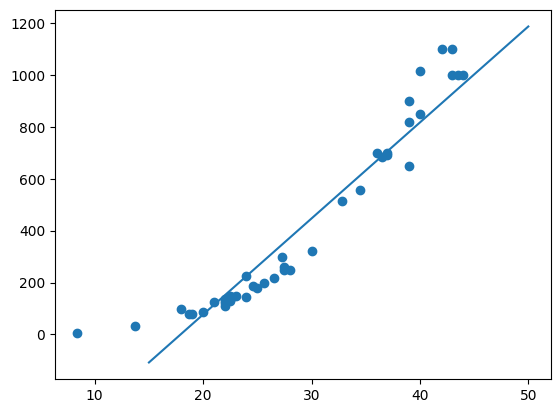

In [20]:
import matplotlib.pyplot as plt
plt.scatter(train_input, train_target)
plt.plot([15, 50], [15*37 - 663, 50*37 - 663]) # 선그래프: plt.plot([시작점, 끝점(절편)])

In [21]:
print(lr.score(train_input, train_target))
print(lr.score(test_input, test_target))

0.9167189115964669
0.9157706499239604


In [23]:
lr.predict([[1]]) # 1cm 도미 무게 입력했는데, 음수값 나옴 -> 근데 생선은 음수 무게 가질 수 없음 -> 이는 회귀선이 음수로까지 이어지기 때문

C:\Users\1-08\Desktop\DAMF2\ml\venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[-626.20587197]])

In [43]:
# 다항 회귀

# Lenght2 값 제곱해 새 컬럼으로 추가
train_input['Length2_poly'] = train_input['Length2'] ** 2
test_input['Length2_poly'] = test_input['Length2'] ** 2

In [45]:
lr = LinearRegression()
lr.fit(train_input, train_target) # input에 길이, 길이의 제곱 들어 있음
lr.score(test_input, test_target)
lr.predict([[3, 9]]) # 컬럼 2개 됐으니까, 데이터 2개 넣어야 함 -> lr.predict([[궁금한 무게, 그 값의 제곱값]])

C:\Users\1-08\Desktop\DAMF2\ml\venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[73.44710456]])

In [42]:
print(lr.coef_, lr.intercept_) # 회귀선: a=1, b=-22, c=130 -> (x, x제곱) 순으로 넣은 거니까, 1번째가 x인 b의 값임

[[-22.19684153   1.01734953]] [130.8814834]
